# CSIT321 FYP: Counting Maize Tassels in the Wild via Deep Neural Network
## Project Members:
### - Lim Gyu Hyun
### - Lim Wei Han
### - Phua Zhon
### - Chua Ki Min
### - Guok Mee Han

## Project Description:

### Accurate counting of maize tassels is important for monitoring the growth status of maize plants. In this project, the group is expected to develop a robust deep neural network model to accurately count maize tassels in order to free humans (farmers) from intensive manual work of counting maize tassels.
### The expected outcome of this project will be a system that can automatically read maize plant image, predict the maize tassel number, and visualize the counting result with an acceptable accuracy.
### This will largely reduce the human labour and meet the need to large-scale analysis of phenotype in agriculture.


In [1]:
import pandas as pd
import numpy as np
import cv2

import matplotlib
from matplotlib import pyplot as plt, patches
from matplotlib.pyplot import figure
%matplotlib inline

import os
import scipy.io

In [2]:
annots = scipy.io.loadmat('./Sample_Images/T0006_XM_20120815160306_01')

In [4]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotation'])

In [5]:
annots["annotation"]

array([[(array(['T0006_XM_20120815160306_01'], dtype='<U26'), array([[1912, 1443],
       [1460, 1640],
       [ 797, 1565],
       [ 219, 1633],
       [ 365,  436],
       [ 779,  443],
       [1420,  734],
       [2446,  489],
       [1864,  362],
       [2534, 1584],
       [3162, 1620],
       [2834,  615],
       [3121,  552],
       [1186,   54],
       [ 224, 2423],
       [3490, 2630],
       [3214, 2639]], dtype=uint16))]],
      dtype=[('filename', 'O'), ('bndbox', 'O')])

In [6]:
type(annots["annotation"]),annots["annotation"].shape

(numpy.ndarray, (1, 1))

In [7]:
type(annots['annotation'][0][0]),annots['annotation'][0][0].shape

(numpy.void, ())

In [9]:
annots["annotation"][0][0]

(array(['T0006_XM_20120815160306_01'], dtype='<U26'), array([[1912, 1443],
       [1460, 1640],
       [ 797, 1565],
       [ 219, 1633],
       [ 365,  436],
       [ 779,  443],
       [1420,  734],
       [2446,  489],
       [1864,  362],
       [2534, 1584],
       [3162, 1620],
       [2834,  615],
       [3121,  552],
       [1186,   54],
       [ 224, 2423],
       [3490, 2630],
       [3214, 2639]], dtype=uint16))

In [10]:
annots["annotation"][0][0]["filename"],annots["annotation"][0][0]["bndbox"]

(array(['T0006_XM_20120815160306_01'], dtype='<U26'),
 array([[1912, 1443],
        [1460, 1640],
        [ 797, 1565],
        [ 219, 1633],
        [ 365,  436],
        [ 779,  443],
        [1420,  734],
        [2446,  489],
        [1864,  362],
        [2534, 1584],
        [3162, 1620],
        [2834,  615],
        [3121,  552],
        [1186,   54],
        [ 224, 2423],
        [3490, 2630],
        [3214, 2639]], dtype=uint16))

In [11]:
flat_list = [item for sublist in annots["annotation"][0][0] for item in sublist]
flat_list

['T0006_XM_20120815160306_01',
 array([1912, 1443], dtype=uint16),
 array([1460, 1640], dtype=uint16),
 array([ 797, 1565], dtype=uint16),
 array([ 219, 1633], dtype=uint16),
 array([365, 436], dtype=uint16),
 array([779, 443], dtype=uint16),
 array([1420,  734], dtype=uint16),
 array([2446,  489], dtype=uint16),
 array([1864,  362], dtype=uint16),
 array([2534, 1584], dtype=uint16),
 array([3162, 1620], dtype=uint16),
 array([2834,  615], dtype=uint16),
 array([3121,  552], dtype=uint16),
 array([1186,   54], dtype=uint16),
 array([ 224, 2423], dtype=uint16),
 array([3490, 2630], dtype=uint16),
 array([3214, 2639], dtype=uint16)]

In [38]:
image_data=[]
bndbox = []
for item in annots["annotation"][0][0]["filename"]:
    image_data.append(item) 
for item in annots["annotation"][0][0]["bndbox"]:
    bndbox.append(item)

In [63]:
#counter = 1
#columns.append("bndbox_x")
#columns.append("bndbox_y")
#for i in range(0,int((len(image_data)-1)/2)):
    #columns.append("bndbox_x"+str(counter))
    #columns.append("bndbox_y"+str(counter))
    #counter+=1

In [64]:
columns = ["filename"]
data = pd.DataFrame([image_data], columns=columns)
data["bndbox"]=[bndbox]
data["count"] = len(bndbox)
data.head()

,filename,bndbox,count
0,T0006_XM_20120815160306_01,"[[1912, 1443], [1460, 1640], [797, 1565], [219...",17


In [71]:
img = cv2.imread('./Sample_Images/T0006_XM_20120815160306_01.jpg')
img.shape

(2736, 3648, 3)

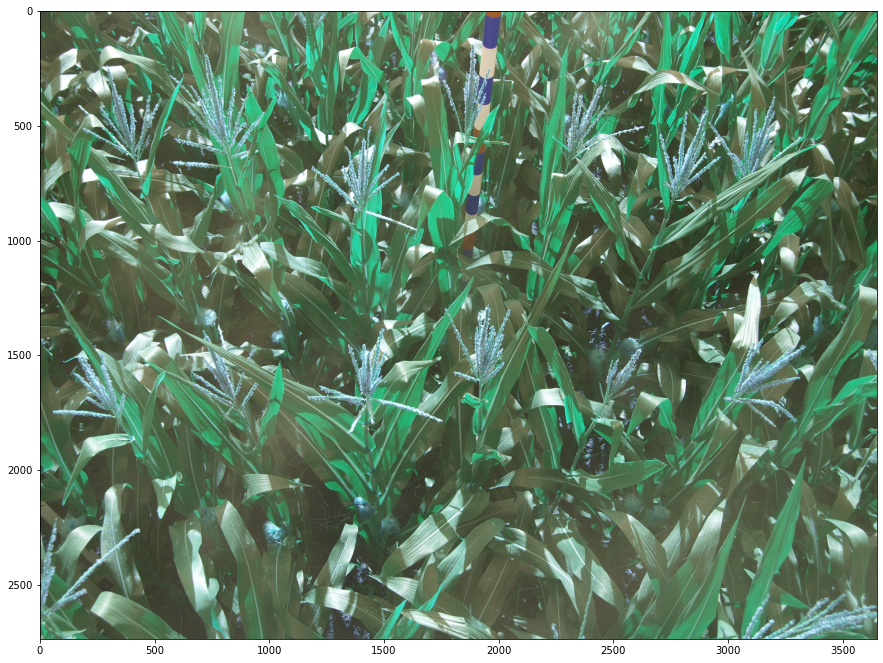

In [72]:
fig, ax = plt.subplots(1, figsize=(15, 15))
plt.imshow(img)

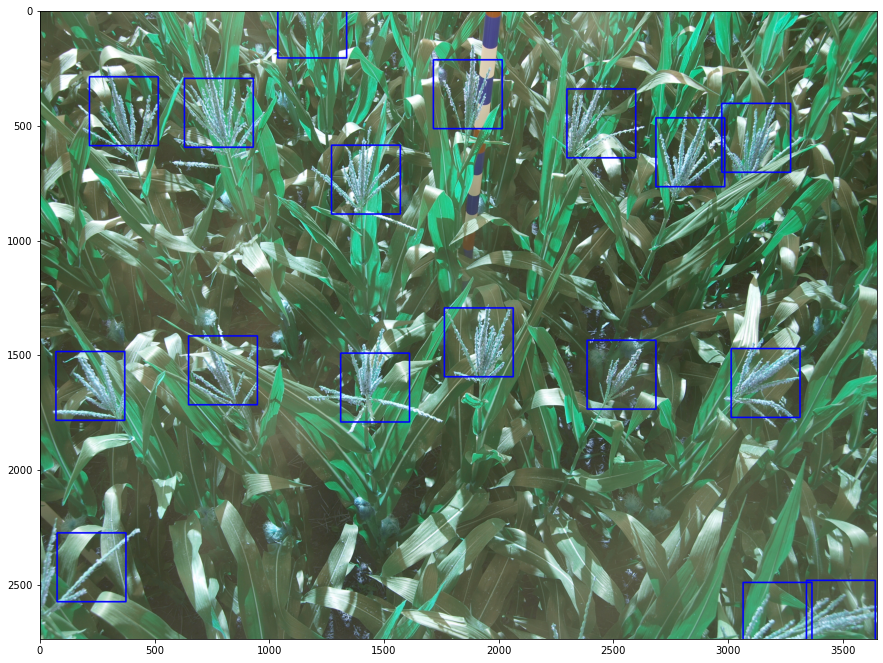

In [73]:
fig, ax = plt.subplots(1, figsize=(15, 15))
for item in bndbox:
    rect = cv2.rectangle(img,(item[0]-150,item[1]+150),(item[0]+150,item[1]-150), (0, 0, 255),5)
plt.imshow(img)

### Counting by Detection
Counting by detection approaches leverage state-of-the-art detection models like Faster R-CNN (Ren et al., 2015), R-Fcn (Dai et al., 2016), RetinaNet (Lin et al., 2017), SSD (Liu et al., 2016), and YOLO (Redmon et al., 2016; Redmon and Farhadi, 2018) to detect, and subsequently count, the entities of interest in the image. Each of these approaches makes architectural decisions to balance speed vs. accuracy as detailed in Huang et al. (2017). In general, single-stage detectors like SSD and YOLO tend to be lighter weight and faster than two-stage detectors like Faster-RCNN, at the cost of accuracy, although performance is strongly dependent on the choice of backbone.

In addition to the framework, the choice of backbone also impacts performance and speed. Commonly use backbones include VGG (Simonyan and Zisserman, 2014), ResNet (He et al., 2016), EfficientNet (Tan and Le, 2019), and MobileNet (Howard et al., 2017), again with the speed/performance needs of the end application dictating the choice of architecture.

Recently, new detection paradigms have come to surpass the now “standard” approaches like Faster R-CNN. RetinaNet (Lin et al., 2017) leveraged focal loss and a dense detection model which performed at speeds comparable to one-stage detectors while outperforming two-stage detectors on the COCO benchmark. DETR (Zhu et al., 2020) used transformers with the same or fewer parameters to outperform Faster R-CNN on the COCO benchmarks. Similarly, EfficientDet (Tan et al., 2020) used a very lightweight bi-directional feature pyramid to drive enhanced performance. Although lightweight, these are not commonly deployed in mobile frameworks currently, and therefore not the focus of the present analysis.

Detection-based approaches work best in sparse counting scenarios where the entities are well separated, occlusions are limited, the number of entities is relatively low, and entities are larger in size (Elbishlawi et al., 2020). The computational efficiency of these models often scales with the number of detections and therefore can perform quite inefficiently in a dense-counting scenario (Arteta et al., 2016). Furthermore, the amount of memory required grows with the number of detections for processing the potential candidates; this can require a large amount of compute when the count is high, or require the image to be windowed if a high count is anticipated

### Counting by Density-Estimation

In contrast to counting by detection, density-estimation approaches are tailored to scenarios where the number of entities may be quite large (potentially in the hundreds to thousands), occlusions and overlaps are present, and entities can be quite small in size (perhaps only a few pixels). These approaches tend to use architectures more characteristic of segmentation tasks such as the fully convolutional encoder-decoder structure of U-Net (Ronneberger et al., 2015). Recent work in this area has used more complex networks to handle the variations in size, scale, and perspective common in dense crowd counting scenarios (Boominathan et al., 2016; Sang et al., 2019; Xu et al., 2019). When localization is desired, but an exact bounding box is not required, density-estimation techniques provide a useful alternative to detection-based counting methods.